In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [3]:
response = requests.get(endpoint)

In [4]:
response

<Response [200]>

In [5]:
result = response.json()

In [6]:
search_dict = {}
for line in result:
    count = int(line.get('query_count'))
    text = line.get('query_text')
    if text in search_dict:
        search_dict[text] += count
    else:
        search_dict[text] = count

In [7]:
search_df = pd.DataFrame.from_dict(search_dict, orient = 'index')
search_df = search_df.reset_index()
search_df.columns = ['term', 'text']
search_df.head()

,term,text
0,ebid,521
1,property maps,252
2,maps,237
3,property tax,214
4,jobs,210


In [8]:
search_df = search_df.sort_values('text', ascending=False)
search_df.head(10)

,term,text
0,ebid,521
1,property maps,252
2,maps,237
10,property taxes,235
3,property tax,214
4,jobs,210
5,employment,189
7,police,167
8,criminal court clerk,167
9,media releases,165


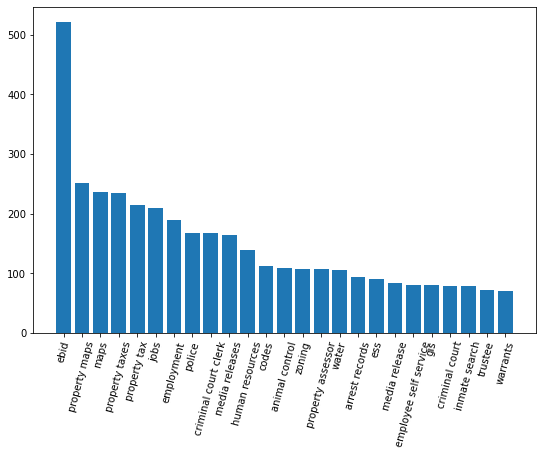

In [9]:
plt.figure(figsize=(9,6))
plt.bar('term', 'text', data = search_df.head(25))
plt.xticks(rotation = 75);

## QUESTION 1: Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

In [10]:
endpoint ='https://data.nashville.gov/resource/fuaa-r5cm.json'

In [11]:
args = '?year=2016&query_text=fire&$limit=50000'

In [12]:
fire = endpoint + args

In [13]:
response = requests.get(fire)

In [14]:
response

<Response [200]>

In [15]:
fire_df = pd.read_json(fire)

In [16]:
fire_df = fire_df.reset_index(drop= True)

In [17]:
fire_df = fire_df.sort_values('query_count',ascending = False)

In [18]:
fire_df

,month_name,year,query_count,query_text
7,August,2016,47,fire
9,October,2016,38,fire
11,December,2016,38,fire
8,September,2016,36,fire
1,February,2016,35,fire
2,March,2016,32,fire
10,November,2016,32,fire
5,June,2016,31,fire
3,April,2016,26,fire
4,May,2016,24,fire


## QUESTION 2: Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [19]:
endpoint ='https://data.nashville.gov/resource/fuaa-r5cm.json'

In [21]:
args = '?$where=query_count>100&$limit=50000'

In [22]:
big_query = endpoint + args

In [23]:
response = requests.get(big_query)

In [24]:
result = response.json()
len(result)

1241

In [25]:
response

<Response [200]>

In [26]:
big_query_df = pd.read_json(big_query)

In [27]:
big_query_df

,month_name,year,query_count,query_text,month
0,March,2014,101,permits,NaN
1,January,2015,101,criminal court clerk,NaN
2,September,2015,101,codes,NaN
3,March,2016,101,police,NaN
4,March,2016,101,civil service,NaN
...,...,...,...,...,...
1236,September,2018,750,annual enrollment,NaN
1237,October,2018,816,annual enrollment,NaN
1238,January,2019,2646,Nashville,1.0
1239,September,2019,5327,directory,9.0


## QUESTION 3: Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [28]:
endpoint ='https://data.nashville.gov/resource/fuaa-r5cm.json'

In [29]:
args = '?$where=query_count>100&query_text=codes&$limit=50000'

In [30]:
big_codes = endpoint + args

In [31]:
response = requests.get(big_codes)

In [32]:
result = response.json()
len(result)

55

In [33]:
response

<Response [200]>

In [34]:
big_codes_df = pd.read_json(big_codes)

In [35]:
big_codes_df

,month_name,year,query_count,query_text,month
0,September,2015,101,codes,NaN
1,April,2021,102,codes,4.0
2,August,2016,104,codes,NaN
3,November,2020,104,codes,11.0
4,December,2017,106,codes,NaN
5,May,2016,107,codes,NaN
6,April,2016,111,codes,NaN
7,January,2017,115,codes,NaN
8,May,2021,115,codes,5.0
9,August,2015,117,codes,NaN


## QUESTION 4: Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [36]:
args = '?query_text=maps&$limit=50000&$where=query_count>0'

In [37]:
maps = endpoint + args

In [38]:
response = requests.get(maps)

In [39]:
map_result = response.json()
len(map_result)

82

In [40]:
response

<Response [200]>

In [41]:
search_dict = {}
for line in map_result:
    count = int(line.get('query_count'))
    text = line.get('month_name')
    if text in search_dict:
        search_dict[text] += count
    else:
        search_dict[text] = count

In [42]:
map_df = pd.DataFrame.from_dict(search_dict, orient = 'index')
map_df = map_df.reset_index()
map_df.columns = ['month', 'map_count']
map_df = map_df.sort_values('map_count',ascending=False)
map_df




,month,map_count
3,April,1309
5,June,1216
2,March,1090
6,July,1062
4,May,1019
7,August,991
9,October,981
8,September,951
0,January,924
1,February,832


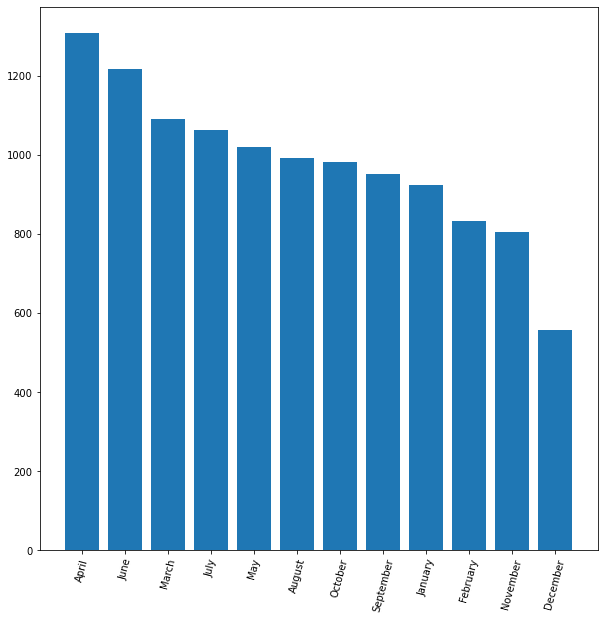

In [43]:
plt.figure(figsize=(10,10))
plt.bar('month', 'map_count', data = map_df)
plt.xticks(rotation = 75);

## QUESTION 5: Make an API request to pull back all the data from hubNashville (311) Service Requests (check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one)

In [75]:
hub_endpoint = 'https://data.nashville.gov/resource/7qhx-rexh.json?$limit=800000'

In [76]:
hub_response = requests.get(hub_endpoint)

In [77]:
hub_result = hub_response.json()

In [78]:
len(hub_result)

716510

In [48]:
#hub nashville has 716510 rows of data


## QUESTION 6: Find 2 new data sets on data.nashville.gov, make API requests to pull the data, and do an analysis that combines the data sets.QUESTION 6: 

In [49]:
lib_circ_endpoint = 'https://data.nashville.gov/resource/bvn9-gwpg.json'

In [50]:
lib_cir_response = requests.get(lib_circ_endpoint)

In [51]:
lib_cir_response

<Response [200]>

In [52]:
lib_cir_result = lib_cir_response.json()

In [53]:
lib_fac_endpoint = 'https://data.nashville.gov/resource/vn5u-d69i.json'

In [63]:
lib_fac_args = '?$select=library_name,books_and_materials,downloadable_materials,streaming_materials,story_times,public_computers,public_internet,restrooms,book_drop,location'

In [64]:
lib = lib_fac_endpoint + lib_fac_args

In [65]:
lib_response = requests.get(lib)

In [66]:
lib_response

<Response [200]>

In [67]:
lib_result = lib_response.json()

In [68]:
len(lib_result)

22

In [69]:
lib_cir_df = pd.read_json(lib)

In [70]:
lib_cir_df

,location,library_name,books_and_materials,downloadable_materials,streaming_materials,story_times,public_computers,public_internet,restrooms,book_drop
0,"{'latitude': '35.681402', 'longitude': '-85.77...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'latitude': '36.17912', 'longitude': '-86.750...",East,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,"{'latitude': '36.166888', 'longitude': '-86.82...",Hadley Park,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,"{'latitude': '36.225814', 'longitude': '-86.72...",Inglewood,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,"{'latitude': '36.152105', 'longitude': '-86.84...",Richland Park,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
5,"{'latitude': '36.162414', 'longitude': '-86.78...",Main,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
6,"{'latitude': '36.138982', 'longitude': '-86.78...",Edgehill,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
7,"{'latitude': '36.110801', 'longitude': '-86.74...",Thompson Lane,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
8,"{'latitude': '36.109283', 'longitude': '-86.80...",Green Hills,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
9,"{'latitude': '36.16275', 'longitude': '-86.800...",Watkins Park,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [ ]:
lib_fac_df = pd.read_json(lib_result)